# **Projeto de Governaça em TI | S01/2022**

__Professor__: Edson M. Souza

__Discplina__: Ciência de Dados

__Projeto__: Governança de TI

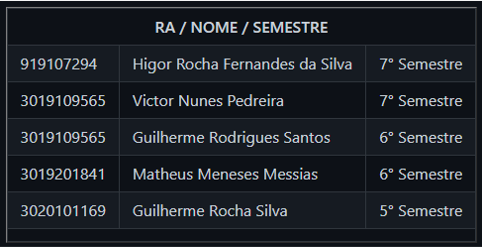

----------------------------------------------
# **Objetivo**

Neste Semestre o novo desafio foi realizar uma Análise de Dados completa sobre Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019. O ponto principal e mais importante é a aplicação das técnicas de ciência de dados aprendidas durante as aulas.

Por muitos anos os aviões tem sido considerados o segundo meio de transporte mais seguro do mundo. Cobrindo longas viagens em um curto espaço de tempo, algumas aeronaves proveram diversas vantagens para o mundo. Mas, infelizmente, como todo meio de transporte, as aeronaves possuem sua conta de tragédias. 

O último caso, até a data de publicação deste estudo foi o acidente do avião da **LAMIA**, que transportava o **time de futebol da Chapecoense** para a final de um campeonato na Colombia. O caso reacendeu discursões, destacando a segurança dos aviões e até onde a capacitação humana influência no desenrolar de um incidente.

----------------------------------------------
# **Bibliotecas**

Para iniciar o projeto temos uma breve explicação + importação das bibliotecas que serão utilizadas para o desenvolvimento do código.

* **Pandas:** Essa é a biblioteca perfeita para iniciar suas análises exploratórias de dados, pois ela nos permite ler, manipular, agregar e plotar os dados em poucos passos (**Medium**, 2020).

* **Numpy:** Fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos. Esses tipos de cálculos numéricos são amplamente utilizados em tarefas como: Machine learning, Processo de imagem e Computação grafica e Tarefas matemáticas. (**Medium**, 2018)

* **Matplotlib:** O Matplotlib é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. (**King Host**, 2018)

* **Seaborn:** O Seaborn ajuda a visualizar as relações estatísticas. Para entender como as variáveis ​​em um conjunto de dados estão relacionadas umas às outras e como essa relação depende de outras variáveis, realizamos análises estatísticas. (**Acervolima**, 2022)

* **Scipy/scipy.stats:** A biblioteca SciPy disponibiliza muitas funcionalidades de computação científica implementadas de forma eficiente, incluindo integração numérica, interpolação, otimização, álgebra linear e Estatística. A documentação completa pode ser encontrada em docs.scipy.org/doc. (**GitHub**, 2021)

* **Collections counter:** Este módulo implementa tipos de dados de contêineres especializados que fornecem alternativas aos contêineres embutidos do Python, `dict`, `list`, `set` e `tuple`. (**Python**, 2022)

* **Pywaffle:** Um gráfico de waffle é uma técnica de visualização envolvente que normalmente é criada para exibir o progresso em direção aos objetivos. Onde cada célula no Waffle Chart constitui 10 X 10 uma grade de células em que cada célula representa um ponto percentual totalizando 100%.

In [3]:
import numpy as np # para calculos lineares
import pandas as pd # para os arquivos CSV/XLXS (pd.read_XXX)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

In [7]:
# Instalando o pywaffle
!pip install pywaffle -q

In [8]:
# Importando as bibliotecas necessárias para o pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

----------------------------------------------
# **Importação dos dados**

Neste passo, é de extrema importância o cuidado para importação dos dados a serem utilizados nas consultar. Seguimos com a importação dos dados do *CENIPA*, das ocorrências de Acidentes Aéreos (**2010 a 2019**):

In [6]:
#importação dos dados CENIPA Local
dadosCenipa = pd.read_csv ('/content/ocorrencias_cenipa.csv')

# **Adicionando valores nas colunas**

Neste passo, estamos utilizando o código para adicionar o valor do item em cada coluna nos gráficos, seja ele horizontal, vertical ou demais.

In [11]:
#exibir dados no gráfico quando este for em barras horizontais
def valor_coluna(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# **Criando funções**

Mostrando a criação de algumas funções que foram aprendidas em aula e, poderão em algum momento ser utilizar no projeto, principalmente enquanto está em desenvolvimento.

In [ ]:
# HEAD.() = primeiras 5 linhas do quadro de dados são retornadas

def verificacao(DataSet):
  return DataSet.head()
verificacao(dadosCenipa)

In [ ]:
# DTYPES = retorna a classificação dos dados de cada coluna

def verificacao(DataSet):
  return DataSet.dtypes
verificacao(dadosCenipa)

In [ ]:
# INFO() = retorna informações como Colunas, tipos de dados, número de linhas, entre outros.

def verificacao(DataSet):
  return DataSet.info()
verificacao(dadosCenipa)

In [ ]:
# SHAPE = retorna a quantidade de linhas e colunas

def verificacao(DataSet):
  return DataSet.shape
verificacao(dadosCenipa)

# **Curiosidade sobre o Pywaffle**

Este item esta entrando no trabalho mais como uma curiosidade encontrada enquanto o grupo realizava pesquisas na internet. É um estilo de gráfico que foge um pouco dos tradicionais e pode trazer uma dinâmica interessante.

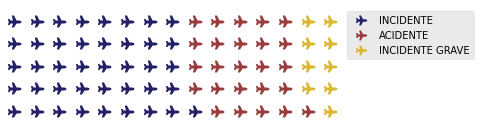

In [ ]:
#importação dos dados CENIPA Online
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")

# extraindo value counts da variavel ocorrencia_classificacao
data = df.ocorrencia_classificacao.value_counts().to_dict()

# plotando gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();


---

#  ❗***A partir deste item se inicia realmente o Projeto mostrando a analise***❗

aos dados de ocorrências de Acidentes Aéreos (2010 a 2019).***

-------------------------------------------
# ▶ **Total de Incidentes de 2010 a 2019**

Para iniciar nosso projeto, é de extrema importância que todos tenham ciência da quantidade de incidentes que ocorreram neste período, pois, é o número em que iremos trabalhar.

In [101]:
print('Total de Incidentes de 2010 a 2019 foram de:', len(dadosCenipa))

Total de Incidentes de 2010 a 2019 foram de: 5242


----------------------------------------------
# ▶ **Ocorrências por Região do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Região Brasileira.

In [33]:
# Divisão das regiões para plotar no gráfico
df_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
              'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
              'Centro Oeste': ['MT', 'MS', 'GO'], 
              'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
              'Sul': ['PR', 'RS', 'SC']}

# Divisão por tipo de acidente
tipos = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

# Criando o diciónario separado por região do Brasil
dic_01 = {i: [ len([k for k in list(dadosCenipa.loc[dadosCenipa['tipo'] == i, ['estado']]['estado'])
                    if k in df_regioes[j]]) for j in df_regioes.keys()] for i in tipos}

dic_01['Região'] = list(df_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

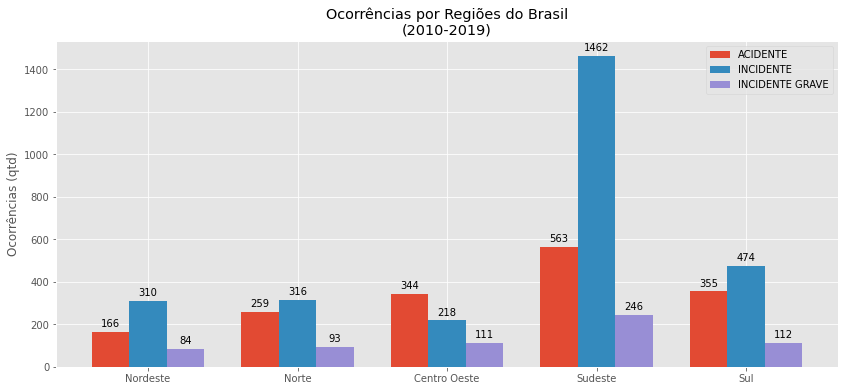

In [62]:
# Criação do Gráfico 01

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

# Separando a Legenda por tipo de Incidente
coluna1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
coluna2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')
coluna3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE')

# Dando título a visualização
ax.set_ylabel('Ocorrências (qtd)')
ax.set_title('Ocorrências por Regiões do Brasil\n(2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

valor_coluna(coluna1, ax)
valor_coluna(coluna2, ax)
valor_coluna(coluna3, ax)
plt.show()

**Análise em cima do gráfico anterior**

- A região do Brasil que mais relata ocorrências aéreas é o **Sudeste**, em ambos casos de Acidente (563), Incidente (1462) e Incidente Grave (246). 

- A região do Brasil que menos relata ocorrências aéreas em casos de Acidentes (166) e Incidentes Graves (84) é o **Nordeste**.

- A região do Brasil que menos relata ocorrências aéreas em casos de Incidentes (218), é o **Centro-Oeste**.

# ▶ **Ocorrências por Estados do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Estado Brasileiro.


In [89]:
# Realizando a contagem de itens separando por estado do País

ocorr_estado = Counter(dadosCenipa['estado'])
fase_estado = sorted(ocorr_estado, key = ocorr_estado.get, reverse = True)
contador_estado = sorted(list(ocorr_estado.values()), reverse = True)

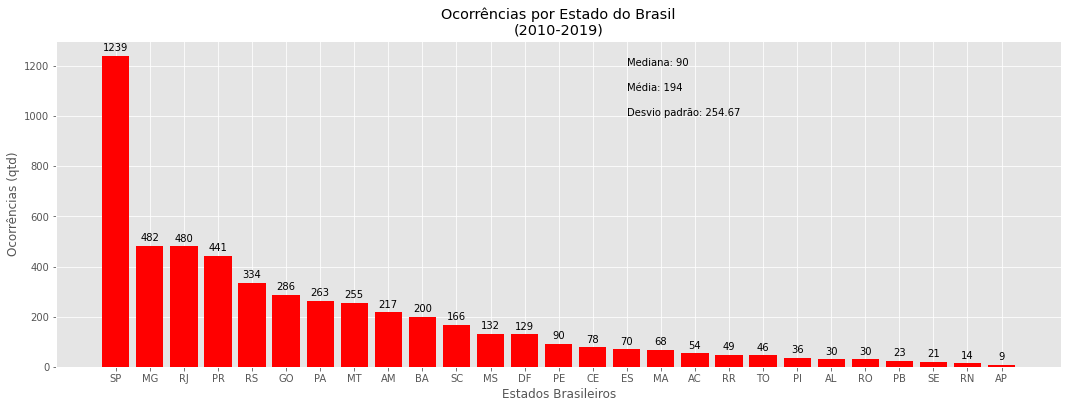

In [90]:
# Criação do Gráfico 02

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_estado
y=contador_estado

# Dando cor aos dados
rects1 = ax.bar(x, y,color='Red')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Estados Brasileiros")
plt.title('Ocorrências por Estado do Brasil\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(15, 1200, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(15, 1100, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(15, 1000, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

valor_coluna(rects1, ax)
plt.show()
               

**Análise em cima do gráfico anterior**

- O estado do Brasil em que mais se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **São Paulo - SP** com **1239**.

- o estado do Brasil em que menos se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Amapá - AP** com **9** casos.

- A média calculada neste caso só ficou elevada assim (**194**) devido a grande concentração em SP, como pudemos analisar.

# ▶ **Ocorrências por Cidades do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Cidade Brasileira.

In [102]:
# Realizando a contagem de itens separando por cidades do País

ocorr_cidades = Counter(dadosCenipa['cidade'])
labels_cidades = sorted(ocorr_cidades, key=ocorr_cidades.get, reverse=True)
dados_cidades = sorted(list(ocorr_cidades.values()), reverse=True)

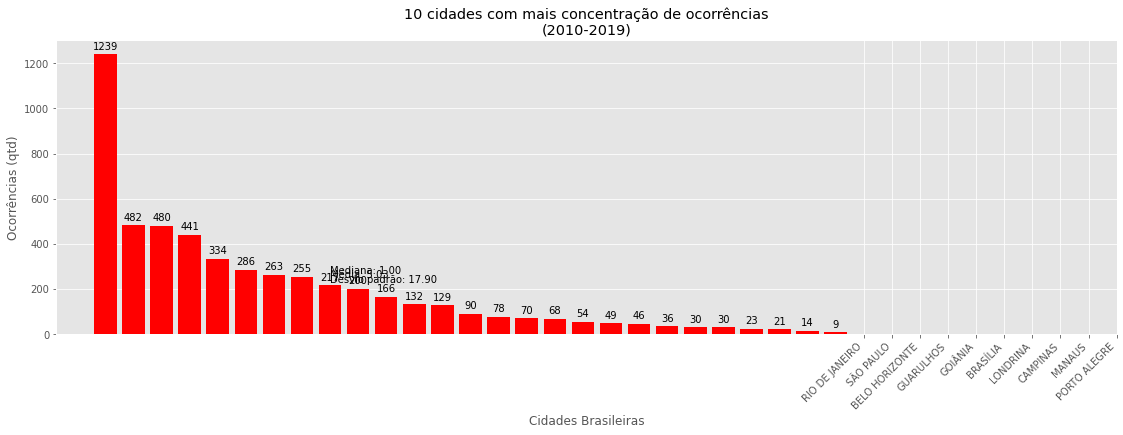

In [103]:
# Criação do Gráfico 03

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(19, 6))
fig.autofmt_xdate(rotation=45)

# Dando cor aos dados
rects = ax.bar(x, y, color='red')

# Separa apenas os dez primeiros dados dos arrays
x = labels_cidades[:10]
y = dados_cidades[:10]

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Cidades Brasileiras")
plt.title('10 cidades com mais concentração de ocorrências\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(8, 270, 'Mediana: %.2f'%(np.median(np.array(dados_cidades))))
plt.text(8, 250, 'Média: %.2f'%(np.mean(np.array(dados_cidades))))
plt.text(8, 230, 'Desvio padrão: %.2f'%(static.stdev(dados_cidades)))

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- A cidade do Brasil em que mais se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Rio de Janeiro** com **293** casos.

- A cidade do Brasil em que menos se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Porto Alegre** com **94** casos.

- A porcentagem de ocorrências destas 10 principais cidades corresponde a 29% do total

----------------------------------------------
# ▶ **Ocorrências por Dia**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada dia, mas antes extraindo a contagem de uma data.

In [104]:
# Realizando a extração da quantidade em cima da data usando LAMBDA

dadosCenipa['data'] = pd.to_datetime(dadosCenipa['data'])
dadosCenipa['Mes'] = dadosCenipa['data'].map(lambda x: x.month)
dadosCenipa['Dia'] = dadosCenipa['data'].map(lambda x: x.day)

In [110]:
# Realizando a contagem de itens separando por Dia

ocorr_dia = Counter(dadosCenipa['Dia'])
labels_dia = sorted(ocorr_dia, key=ocorr_dia.get, reverse=True)
dados_dia = sorted(list(ocorr_dia.values()), reverse=True)

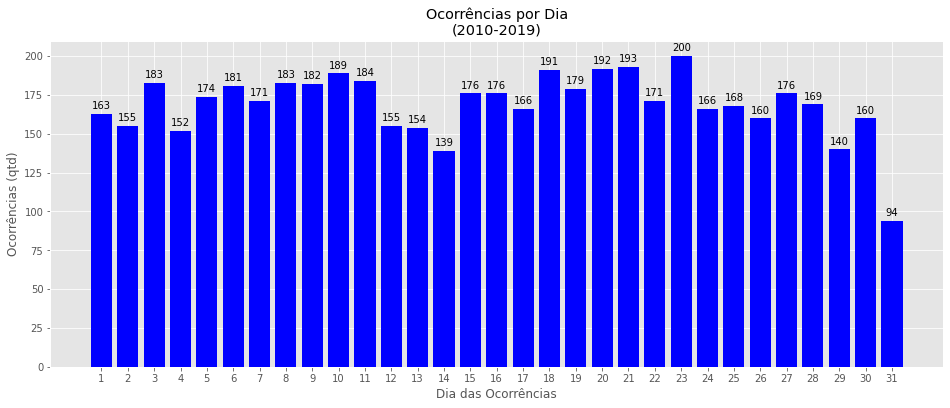

In [111]:
# Criação do Gráfico 04

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_dia
y = dados_dia

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Dia das Ocorrências")
plt.title('Ocorrências por Dia\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- O dia em que ocorreram mais incidentes neste período foi o dia **23** com 200 casos.

- Já o dia em que ocorreram menos incidentes neste período foi o dia **31** com 94 casos.

- A média em decorrência dos dias foi de **169** incidentes.

# ▶ **Ocorrências por Mês**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Mês, mas antes extraindo a contagem de uma data.

In [109]:
# Realizando a contagem de itens separando por Mês

ocorr_mes = Counter(dadosCenipa['Mes'])
labels_mes = sorted(ocorr_mes, key=ocorr_mes.get, reverse=True)
dados_mes = sorted(list(ocorr_mes.values()), reverse=True)

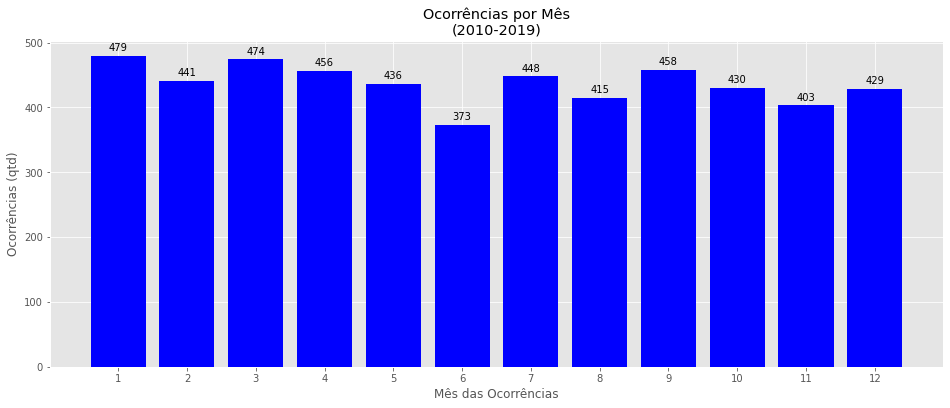

In [108]:
# Criação do Gráfico 05

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_mes
y = dados_mes

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Mês das Ocorrências")
plt.title('Ocorrências por Mês\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- O mês em que ocorreram mais incidentes neste período foi o mês de **Janeiro** com 479 casos.

- Já o mês em que ocorreram menos incidentes neste período foi o mês de **Junho** com 373 casos.

- A média em decorrência dos meses foi de **436** incidentes.

# ▶ **Ocorrências por Ano**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Ano, mas antes extraindo a contagem de uma data.

In [83]:
# Realizando a contagem de itens separando por Ano

ocorr_ano = Counter(dadosCenipa['ano'])
labels_ano = sorted(ocorr_ano, key=ocorr_ano.get, reverse=True)
dados_ano = sorted(list(ocorr_ano.values()), reverse=True)

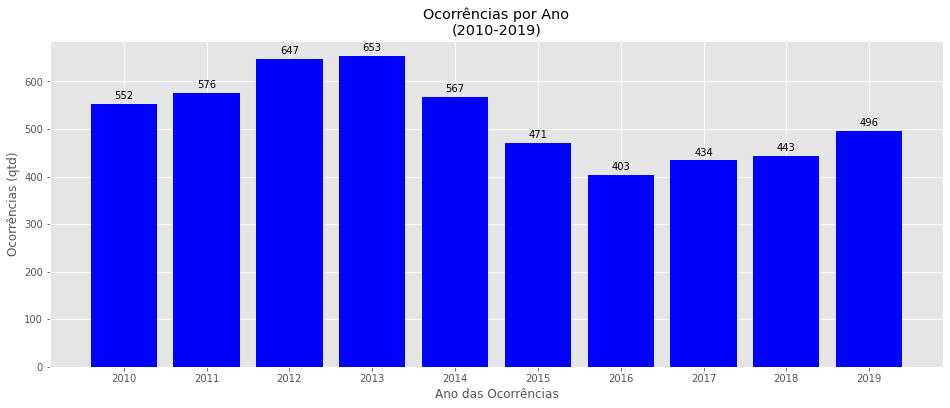

In [88]:
# Criação do Gráfico 06

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_ano
y = dados_ano

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Ano das Ocorrências")
plt.title('Ocorrências por Ano\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()


**Análise em cima do gráfico anterior**

- O ano em que ocorreram mais incidentes neste período foi em **2013** com 653 casos.

- Já o ano em que ocorreram menos incidentes neste período foi em **2016** com 403 casos.

- O número total de incidentes de 2010 a 2019 foram de **5242** incidentes.

# ▶ **Ocorrências por Horário do Incidente**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo Horário que aconteceu, inclusive, uma informação muito **IMPORTANTE**, pois conseguimos ter uma noção se foi a noite, um dos horários mais temidos pelos passageiros.

In [120]:
# Realizando a contagem de itens separando pela Hora do Incidente

ocorr_hora = Counter(dadosCenipa['hora'])
labels_hora = sorted(ocorr_hora, key=ocorr_hora.get, reverse=True)
dados_hora = sorted(list(ocorr_hora.values()), reverse=True)

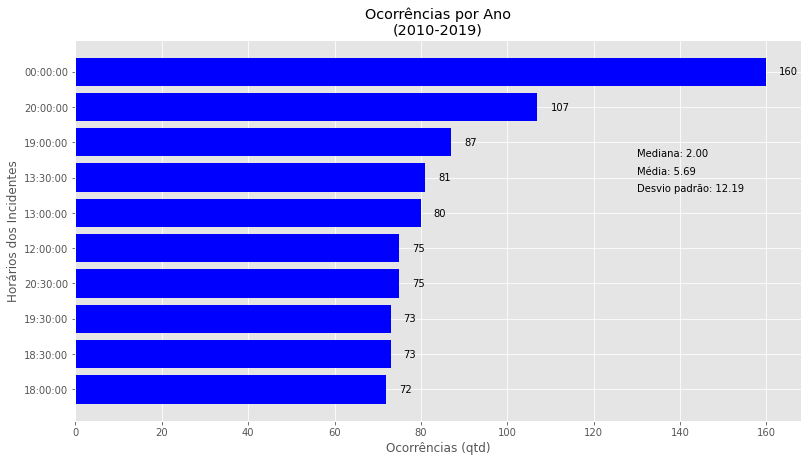

In [127]:
# Criação do Gráfico 07

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=labels_hora[:10]
y=dados_hora[:10]

# Dando cor aos dados
ax.barh(x, y, color='blue')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando título a visualização
plt.ylabel("Horários dos Incidentes")
plt.xlabel("Ocorrências (qtd)")
plt.title('Ocorrências por Ano\n(2010-2019)')

plt.text(130, 2.4, 'Mediana: %.2f'%(np.median(np.array(dados_hora))))
plt.text(130, 2.9, 'Média: %.2f'%(np.mean(np.array(dados_hora))))
plt.text(130, 3.4, 'Desvio padrão: %.2f'%(static.stdev(dados_hora)))

ax.invert_yaxis()
plt.show()

**Análise em cima do gráfico anterior**

- Conforme haviamos mencionado na introdução deste item, ao analisar o gráfico, notamos que horário em que mais relataram ocorrências foi **00:00** com 160 casos.

- *´O risco de um piloto ou copiloto da aviação comercial brasileira falhar de forma grave é cerca de **50% maior** quando sua escala de trabalho se prolonga entre a **meia-noite e as 6 horas da manhã**. A cada 100 horas de voo realizadas durante a madrugada, os comandantes de jato cometem, em média, 9,5 erros de nível 3, o mais perigoso para a segurança da aeronave.'*

- A quantidade dos 10 horários com mais ocorrências representa **16,84%** do total de ocorrências.


----------------------------------------------
# **Ocorrências por Tipo de Aeronave**

In [114]:
# Realizando a contagem de itens separando por Tipo de Aeronave

aeronave_tipo = Counter(dadosCenipa['aeronave_tipo'])
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)
contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

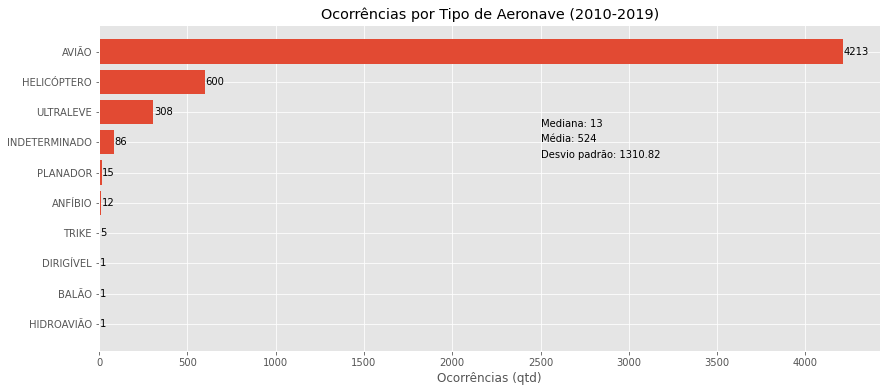

In [41]:
# Criação do Gráfico 07

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=tipo
y=contador_tipo
rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Ocorrências (qtd)")
plt.title('Ocorrências por Tipo de Aeronave (2010-2019)')

plt.text(2500, 2.5, 'Mediana: %d'%(np.median(np.array(contador_tipo))))
plt.text(2500, 3.0, 'Média: %d'%(np.mean(np.array(contador_tipo))))
plt.text(2500, 3.5, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo)))

plt.show()

Observamos que o **avião** é onde ocorre a maioria das ocorrências. Os tipos **Dirígel**, **Balão**, **Hidroavião** são o que menos ocorrências aconteceram nesse período (2010-2019). A média de 524 é alta por conta da quantidade de ocorrências do avião que é discrepante dos demais tipos. O desvio padrão é alto pelo mesmo motivo anterior.

# Ocorrências por ano de fabricação da aeronave

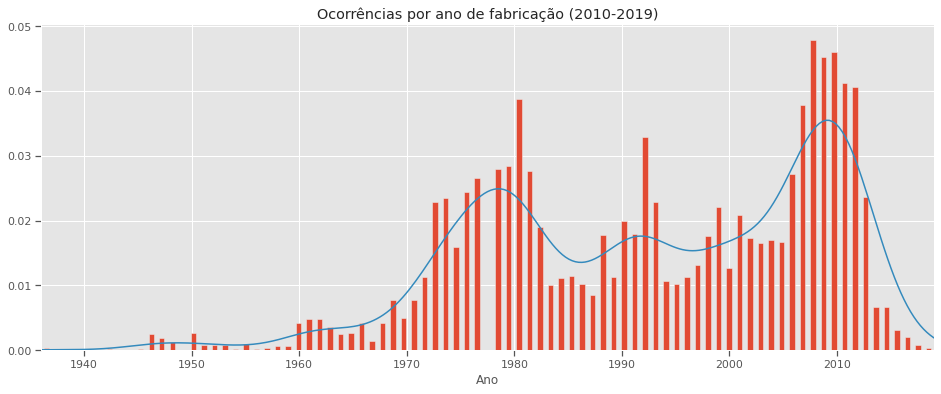

In [ ]:
plt.style.use("ggplot")

fig, axes = plt.subplots(figsize=(16,6))

x=dados.aeronave_ano_fabricacao
plt.hist(x, density=True, bins=85, rwidth=0.5)
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
axes.set_xlim(xmin=1936) 
axes.set_xlim(xmax=2019) 
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.xlabel('Ano')
plt.title('Ocorrências por ano de fabricação (2010-2019)')

plt.show()

Nota-se que o ano de fabricação que apresentou mais ocorrências (**229**) nesse período foi: **2008**

Os anos de fabricação que menos ocorrências (**1**) apresentaram foram: **1956**,**1940**,**1954**,**1945** e **1942**

A **média** por ano de fabricação nesse período ficou em **67** ocorrências.

A porcentagem de ocorrências das 10 anos de fabricação (considerando o ano Indeterminado), corresponde a **39,31%** do total

# Ocorrências por tipo de motor

In [ ]:
motor_tipo = Counter(dados['motor_tipo'])
fase_motor_tipo = sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

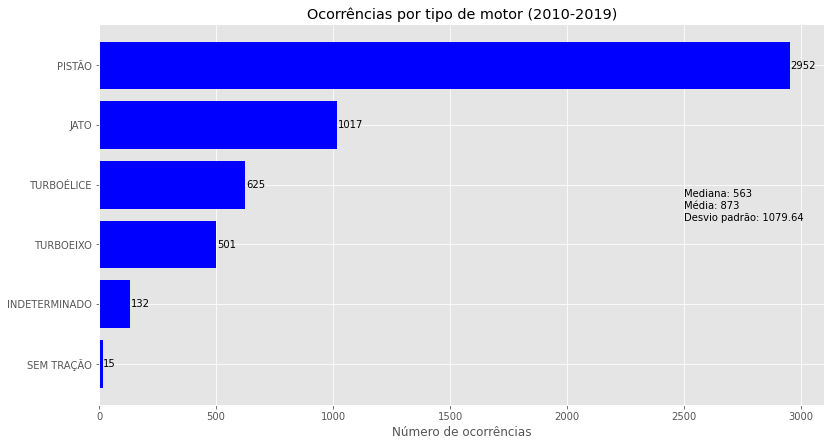

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_motor_tipo
y=contador_motor_tipo

ax.barh(x, y, color='b')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('Ocorrências por tipo de motor (2010-2019)')
plt.text(2500, 2.2, 'Mediana: %d'%(np.median(np.array(contador_motor_tipo))))
plt.text(2500, 2.4, 'Média: %d'%(np.mean(np.array(contador_motor_tipo))))
plt.text(2500, 2.6, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)))
plt.show()

Nota-se que o tipo de motor mais frequente nesse período foi a **PISTÃO**, que representa **56,31%** do total de ocorrências, visto que, há um maior volume de motores movidos a pistão em atividade.

O tipo de motor menos frequente foi o **Sem tração**.

A média de ocorrências por tipo de motor ficou em **873**.

O desvio padrão é alto, fruto da discrepância no número de ocorrência x tipo de motor.

# Ocorrências por quantidade de motores

In [ ]:
aeronave_motor_quantidade = Counter(dados['aeronave_motor_quantidade'])
fase_aeronave_motor_quantidade = sorted(aeronave_motor_quantidade, key = aeronave_motor_quantidade.get, reverse = True)
contador_aeronave_motor_quantidade = sorted(list(aeronave_motor_quantidade.values()), reverse = True)

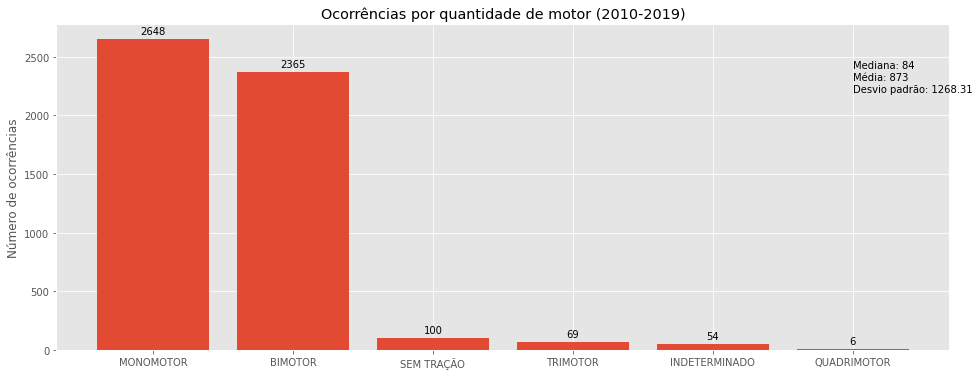

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(16, 6))

x=fase_aeronave_motor_quantidade
y=contador_aeronave_motor_quantidade

rects1=ax.bar(x, y)

plt.xlabel('')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por quantidade de motor (2010-2019)')
plt.text(5, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_aeronave_motor_quantidade))))
plt.text(5, 2300.4, 'Média: %d'%(np.mean(np.array(contador_aeronave_motor_quantidade))))
plt.text(5, 2200.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_motor_quantidade)))

numero_em_cima(rects1, ax)

plt.show()

Nota-se que a quantidade de motor mais frequente nesse período foi a **Monomotor**, que representa **50,51%** do total de ocorrências, de acordo com o maior número de aviões que possuem motores monomotores e bimotores, em relação aos demais.

O tipo de motor menos frequente (**6**) foi o **Quadrimotor**.

A média de ocorrências por tipo de motor ficou em 873.

# Ocorrência por fabricantes

In [ ]:
aeronave_fabricante = Counter(dados['aeronave_fabricante'])
fase_aeronave_fabricante = sorted(aeronave_fabricante, key = aeronave_fabricante.get, reverse = True)
contador_aeronave_fabricante = sorted(list(aeronave_fabricante.values()), reverse = True)

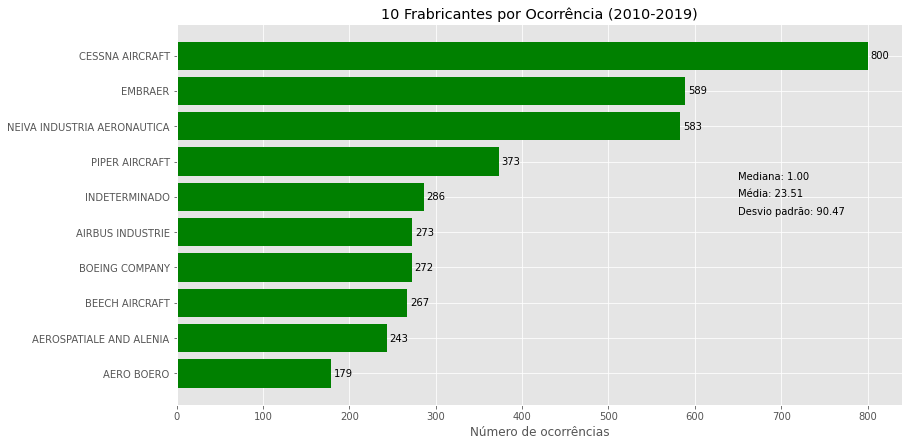

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_aeronave_fabricante[:10]
y=contador_aeronave_fabricante[:10]

ax.barh(x, y, color='g')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')

plt.title('10 Frabricantes por Ocorrência (2010-2019)')
plt.text(650, 3.5, 'Mediana: %.2f'%(np.median(np.array(contador_aeronave_fabricante))))
plt.text(650, 4.0, 'Média: %.2f'%(np.mean(np.array(contador_aeronave_fabricante))))
plt.text(650, 4.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fabricante)))

plt.show()

Nota-se que o fabricante com mais ocorrências **(800)** foi o **Cessna Aircraft**, em razão do número elevado de aeronaves do fabricante em atividade.

A média de ocorrências por fabricante foi de **23,51**.

A porcentagem de ocorrências dos 10 fabricantes corresponde a **73,73%** do total


# Ocorrência por país-fabricante

In [ ]:
aeronave_pais_fabricante = Counter(dados['aeronave_pais_fabricante'])
fase_aeronave_pais_fabricante = sorted(aeronave_pais_fabricante, key = aeronave_pais_fabricante.get, reverse = True)
contador_aeronave_pais_fabricante = sorted(list(aeronave_pais_fabricante.values()), reverse = True)

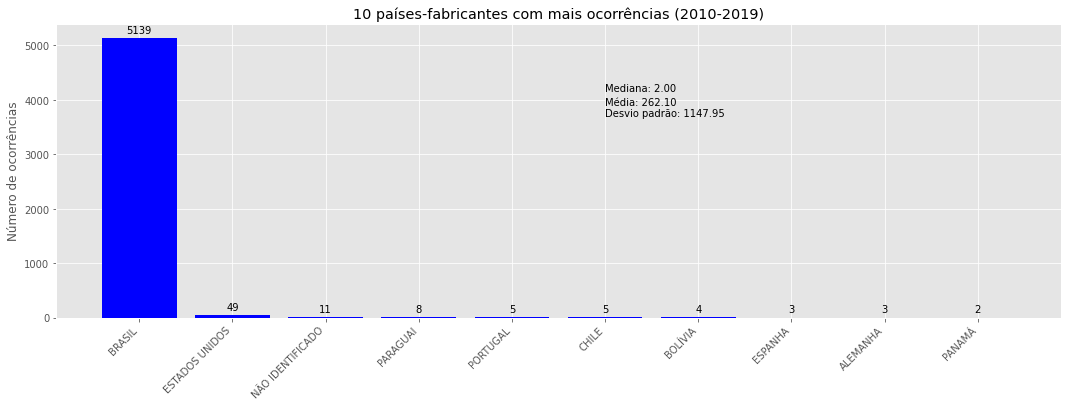

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_aeronave_pais_fabricante[:10]
y=contador_aeronave_pais_fabricante[:10]

rects1=ax.bar(x, y,color='Blue')

ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('10 países-fabricantes com mais ocorrências (2010-2019)')
plt.text(5, 4159.5, 'Mediana: %.2f'%(np.median(np.array(contador_aeronave_pais_fabricante))))
plt.text(5, 3909.0, 'Média: %.2f'%(np.mean(np.array(contador_aeronave_pais_fabricante))))
plt.text(5, 3709.4, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_pais_fabricante)))

numero_em_cima(rects1, ax)

plt.show()

Nota-se que o pais fabricante com mais ocorrências (**5139**) foi: **Brasil**, em razão do maior volume de aeronaves nacionais em atividades.

O pais fabricante com menos ocorrências foi: **Panamá**

A **média** de ocorrências por pais fabricante foi de **262,10**.

# Ocorrências por fase de Operação

In [ ]:
aeronave_fase_operacao = Counter(dados['aeronave_fase_operacao'])
aeronave_fase = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)

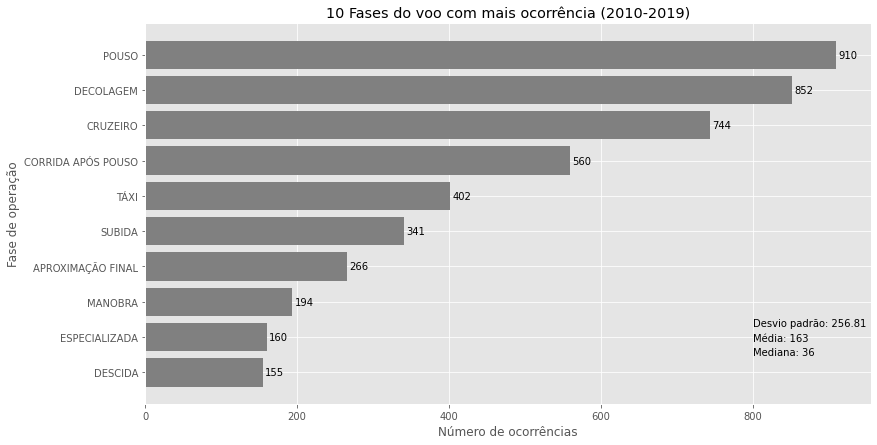

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=aeronave_fase[:10]
y=contador_aeronave_fase_operacao[:10]

ax.barh(x, y, color='grey')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')


ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.title('10 Fases do voo com mais ocorrência (2010-2019)')
plt.text(800, 8.5, 'Mediana: %d'%(np.median(np.array(contador_aeronave_fase_operacao))))
plt.text(800, 8.1, 'Média: %d'%(np.mean(np.array(contador_aeronave_fase_operacao))))
plt.text(800, 7.7, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fase_operacao)))

plt.show()

Nota-se que a fase que apresentou mais ocorrências (**910**) nesse período foi o **Pouso**, devido ao elevado número de variáveis.

As fases que menos ocorrências (**1**) apresentaram foram:  **EMPREGO MILITAR** e **MUDANÇA DE NÍVEL OU ALTITUDE**

A **média** por fase nesse período ficou em **163** ocorrências.

A porcentagem de ocorrências das 10 fases do voo corresponde a 87% do total


# Status da Investigação

In [ ]:
#ocorrência por ano e por status de investigação = FINALIZADA
status_finalizada= list(set(dados['ano']))
dados_status_finalizada = list(dados.loc[(dados['status_investigacao']) == 'FINALIZADA', ['ano']]
                         ['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

In [ ]:
#ocorrência por ano e por status de investigação = ATIVA

status_ativa= list(set(dados['ano']))
dados_status_ativa = list(dados.loc[(dados['status_investigacao']) == 'ATIVA', ['ano']]
                         ['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

In [ ]:
#ocorrência por ano e por status de investigação = INDETERMINADA

status_indeterminada= list(set(dados['ano']))
dados_status_indeterminada = list(dados.loc[(dados['status_investigacao']) == 'INDETERMINADA', ['ano']]
                         ['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

In [ ]:
status_investigacao = Counter(dados['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

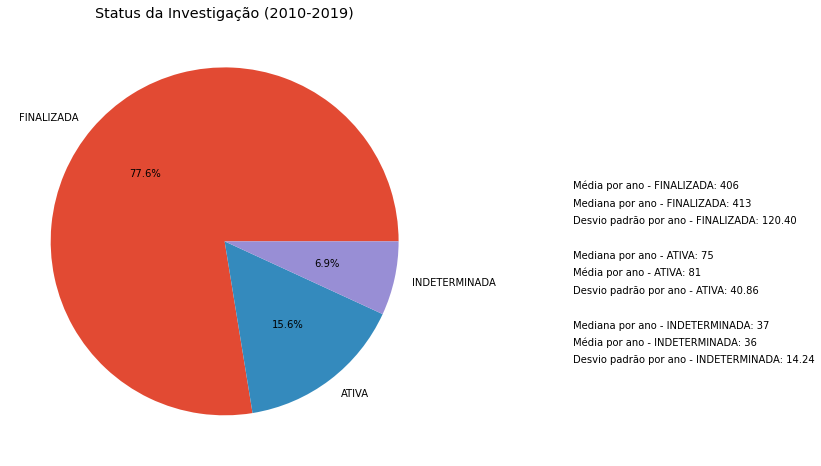

In [ ]:
plt.style.use("ggplot")
plt.title('Status da Investigação (2010-2019)')
plt.text(2, 0.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])))

plt.text(2, -0.1, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.2, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.3, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])))

plt.text(2, -0.5, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.6, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.7, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])))

status = dados['status_investigacao'].value_counts().plot(kind='pie',autopct='%1.1f%%',label='',figsize=(15,8))

Nota-se que a maior parte das ocorrências (**4066**) teve sua **investigação finalizada**, representando **77,6%** do total investigado, pois a maior parte das ocorrências são de gravidade baixa.

A menor parte das ocorrências (360) teve sua investigação **indeterminada**, representando **6,9%** do total 

A **média** de ocorrências **finalizada** foi de **413** por ano.

A **média** de ocorrências **ativa** foi de **81** por ano.

A **média** de ocorrências **indeterminada** foi de **36** por ano.

# Considerações Finais 

O principal objetivo desse trabalho é realizar o levantamento estatístico de acidentes aéreos ocorridos em território brasileiro, entre os anos de 2010 a 2019, buscando apresentar, de forma gráfica, informações que envolvem a aviação nacional.

O conteúdo deste documento levou em consideração os dados disponibilizados na plataforma Github.

As principais ocorrências abordadas serão: região, tipo de aeronave, principais ocorrências e ocorrências por fabricante entre outros.

Os principais resultados da análise foram: 

*   As aeronaves mais afetadas são os aviões com 4.213 mil acidentes, destacando-se as aeronaves com até 6 acentos, monomotores com fabricação de 2008.
*   A principal falha desses aviões são os pistões do motor que representam um total de 56,31 % dos problemas da aeronave, já a fabricante Cessna Aircraft foi a responsável tem um total de 800 casos ou 23,51% do total.
*   Os acidentes em sua grande maioria são leves correspondendo a 55,1% do total, com o mês de janeiro sendo o mês com mais incidentes no ano, já o Sudeste representa a região que mais concentra ocorrências em números absolutos sendo São Paulo o estado mais afetado.






 









# Relatório Final


O presente trabalho buscou apresentar, de forma ilustrativa, o panorama de informações que envolvem a aviação brasileira desse tipo de aeronave entre os anos de 2010 a 2019. É de fundamental importância compreender que o conteúdo deste documento procurou ater-se aos dados coletados e produzidos pelo CENIPA (dados primários), abstendo-se, na medida do possível, de qualquer tipo de análise ou dados de terceiros. 

O principal objetivo desta publicação é o compartilhamento de informações detalhadas sobre ocorrências com aeronaves de asa fixa. Este é um material essencial para compor estudos, análises ou pesquisas com vistas à prevenção de acidentes aeronáuticos. 

Analisando os dados coletados, observa-se que os incidentes são de números e aeronaves diversas sem descriminação entre o ocorrido. No tratamento dos dados, nota-se que a maioria dos casos são de fatores externos e que a maioria dos casos tiveram poucos danos a aeronave ou quase nenhum. 
Dentro dessa análise, percebe-se que as investigações realizadas sobre estas ocorrências teve finalidade, sendo o maior número de ocorrências registradas pelo CENIPA no ano de 2013 e o menor em 2016.

Quando se trata de incidentes aeronáuticos, todos os envolvidos são necessários e mobilizados para o apoio e investigação, seguindo assim os protocolos e regras estabelecidas. Diante do dados, é possível afirmar que os voos, de forma geral, são seguros.  

Por fim conseguimos estabelecer algumas características nos incidentes, sendo eles: os fatores que causaram o incidente/incidente grave/acidente, a média de incidentes por ano, cidade, horários, tipos de aeronaves e o nível de dano causado. A ocorrência que mais se apresenta é a falha do motor durante o voo, opondo-se a colisão com objetos durante a decolagem e o pouso que apresentaram os menores dados. Conclui-se que o número de incidentes são menores, isso comparado ao número de aeronaves que decolam todos os dias durante o ano, porém não são nulos os ocorridos. 



Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena.

Mas, vamos levar em consideração outros meios de transporte, como o carro e moto. Apenas no Brasil em 2013, 41 mil pessoas morreram devido a acidentes de trânsito, fazendo do Brasil o país com maior número de mortes no trânsito da América do Sul. Já no mundo, tais acidentes são responsáveis por mais de 1,25 milhão de fatalidades, tendo uma frequência maior em países como China, EUA e Índia.

----------------------------------------------
# **Referências Bibliográficas**

Abaixo temos todos os sites, livros, artigos, entre demais link de conteúdos acessados das pesquisas que comporam este trabalho.

* CENIPA, **FCA 58-1 Ocorrências Aeronáuticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações 
e Prevenção de Acidentes Aeronáuticos. 2016.

* SANTIAGO Luiz. **Entendendo a biblioteca NumPy**. MEDIUM, 2018. Disponível em: https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355. Acesso em: 29 de Março, 2022.

* RIBEIRO, Lucas. **Introdução a Biblioteca Pandas**. MEDIUM, 2020. Disponível em: https://medium.com/tech-grupozap/-introdu%C3%A7%C3%A3o-a-biblioteca-pandas-89fa8ed4fa38. Acesso em: 30 de Março, 2022.

* LIMA, Stefani. **Visualização de dados em Python: Matplotlib**. KINGHOST, 2018. Disponível em: https://king.host/blog/2018/03/visualizacao-de-dados-matplotlib/#:~:text=O%20Matplotlib%20%C3%A9%20uma%20biblioteca,pizza%2C%20histogramas%20entre%20outras%20op%C3%A7%C3%B5es. Acesso em: 03 de Abril, 2022.

* SATIAM, Kumar. **Visualização de Dados com Python Seaborn e Pandas**. ACERVOLIMA, [Sem data]. Disponível em: https://acervolima.com/visualizacao-de-dados-com-python-seaborn-e-pandas/#:~:text=Seaborn%20%C3%A9%20uma%20biblioteca%20de,estruturas%20de%20dados%20dos%20pandas%20. Acesso em: 03 de Abril, 2022.

* DE MENEZES, Telmo. **A biblioteca SciPy**. GITHUB, 2021. Disponível em: https://tmfilho.github.io/pyestbook/math/03_scip.html#:~:text=A%20biblioteca%20SciPy%20disponibiliza%20muitas,otimiza%C3%A7%C3%A3o%2C%20%C3%A1lgebra%20linear%20e%20Estat%C3%ADstica. Acesso em: 03 de Abril, 2022.

* ADITYANAGRAJ. **Pywaffle em Python**. ACERVOLIMA, [Sem data]. Disponível em: https://acervolima.com/gerar-grafico-waffle-usando-pywaffle-em-python/#:~:text=Um%20gr%C3%A1fico%20de%20waffle%20%C3%A9,um%20ponto%20percentual%20totalizando%20100%25. Acesso em: 29 de Maio, 2022.

* PYTHON. **Collections — Tipos de dados do contêiner**. [S.I.], [?]. Disponível em:
https://docs.python.org/3/library/collections.html. Acesso em: 29 de Maio, 2022

* STATSMODELS. **Statsmodels: Statistical models, hypothesis tests, and data exploration**. [S.I.], [?]. Disponível em: https://www.statsmodels.org/stable/index.html#>. Acesso em: 30 de Maio, 2022